In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Insert path to mavenn beginning of path
import os
import sys

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 6,249
training + validation N: 24,234


,set,tot_ct,ex_ct,y,x
0,training,28,2,0.023406,GGAGUGAUG
1,training,315,7,-0.587914,AGUGUGCAA
2,validation,27,0,-0.438475,UAAGCUUUU
3,training,130,2,-0.631467,AUGGUCGGG
4,training,552,19,-0.433012,AGGGCAGGA
5,training,151,184,1.094011,AAGGUCCGC
6,training,88,4,-0.241737,CAGGCAAAC
7,training,105,5,-0.238471,GUGGCAAAU
8,validation,14,0,-0.167408,CAUGCAGCU
9,training,170,14,-0.048222,CAAGUCACU


In [3]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(L=L,
                     alphabet='rna',
                     gpmap_type='additive', 
                     regression_type='GE',
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)


In [4]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df['y'],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

N = 24,234 observations set as training data.
Using 24.8% for validation.
Data shuffled.
Time to set data: 0.48 sec.


In [5]:
# Fit model to data
model.fit(learning_rate=.001,
          epochs=1000,
          batch_size=200,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/1000
92/92 [==============================] - 1s 6ms/step - loss: 268.2306 - I_var: -0.5132 - val_loss: 254.5117 - val_I_var: -0.4241
Epoch 2/1000
92/92 [==============================] - 0s 3ms/step - loss: 246.9376 - I_var: -0.3570 - val_loss: 237.5490 - val_I_var: -0.3057
Epoch 3/1000
92/92 [==============================] - 0s 3ms/step - loss: 232.0611 - I_var: -0.2567 - val_loss: 224.8442 - val_I_var: -0.2179
Epoch 4/1000
92/92 [==============================] - 0s 2ms/step - loss: 221.3263 - I_var: -0.1895 - val_loss: 216.0564 - val_I_var: -0.1578
Epoch 5/1000
92/92 [==============================] - 0s 3ms/step - loss: 214.1755 - I_var: -0.1331 - val_loss: 210.2031 - val_I_var: -0.1188
Epoch 6/1000
92/92 [==============================] - 0s 2ms/step - loss: 209.3592 - I_var: -0.1024 - val_loss: 205.8030 - val_I_var: -0.0901
Epoch 7/1000
92/92 [==============================] - 0s 3ms/step - loss: 205.4109 - I_var: -0.0753 - val_loss: 202.4029 - val_I_var: -0.0684
Epoch 

Epoch 59/1000
92/92 [==============================] - 0s 2ms/step - loss: 173.0256 - I_var: 0.1600 - val_loss: 170.4721 - val_I_var: 0.1721
Epoch 60/1000
92/92 [==============================] - 0s 2ms/step - loss: 172.8740 - I_var: 0.1566 - val_loss: 170.6682 - val_I_var: 0.1712
Epoch 61/1000
92/92 [==============================] - 0s 2ms/step - loss: 172.8861 - I_var: 0.1580 - val_loss: 170.3547 - val_I_var: 0.1734
Epoch 62/1000
92/92 [==============================] - 0s 2ms/step - loss: 172.7850 - I_var: 0.1599 - val_loss: 170.2839 - val_I_var: 0.1740
Epoch 63/1000
92/92 [==============================] - 0s 3ms/step - loss: 172.7887 - I_var: 0.1627 - val_loss: 170.2686 - val_I_var: 0.1738
Epoch 64/1000
92/92 [==============================] - 0s 2ms/step - loss: 172.8002 - I_var: 0.1663 - val_loss: 170.4377 - val_I_var: 0.1732
Epoch 65/1000
92/92 [==============================] - 0s 2ms/step - loss: 172.6548 - I_var: 0.1639 - val_loss: 170.0755 - val_I_var: 0.1757
Epoch 66/1000

Epoch 117/1000
92/92 [==============================] - 0s 2ms/step - loss: 162.9000 - I_var: 0.2441 - val_loss: 160.6565 - val_I_var: 0.2508
Epoch 118/1000
92/92 [==============================] - 0s 2ms/step - loss: 162.9498 - I_var: 0.2339 - val_loss: 161.3189 - val_I_var: 0.2468
Epoch 119/1000
92/92 [==============================] - 0s 2ms/step - loss: 162.8303 - I_var: 0.2357 - val_loss: 160.5398 - val_I_var: 0.2522
Epoch 120/1000
92/92 [==============================] - 0s 3ms/step - loss: 162.8583 - I_var: 0.2383 - val_loss: 161.3363 - val_I_var: 0.2458
Epoch 121/1000
92/92 [==============================] - 0s 2ms/step - loss: 162.8084 - I_var: 0.2406 - val_loss: 160.8950 - val_I_var: 0.2496
Epoch 122/1000
92/92 [==============================] - 0s 2ms/step - loss: 162.8589 - I_var: 0.2395 - val_loss: 160.5135 - val_I_var: 0.2520
Epoch 123/1000
92/92 [==============================] - 0s 2ms/step - loss: 162.6113 - I_var: 0.2353 - val_loss: 160.7113 - val_I_var: 0.2505
Epoch 

In [6]:
# Save model
model.save('mpsa_ge_additive')

Model saved to these files:
	mpsa_ge_additive.pickle
	mpsa_ge_additive.h5


In [7]:
# Load model
model = mavenn.load('mpsa_ge_additive')

Model loaded from these files:
	mpsa_ge_additive.pickle
	mpsa_ge_additive.h5


In [8]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

On test data:
I_var_test: 0.222 +- 0.028 bits
I_pred_test: 0.260 +- 0.015 bits


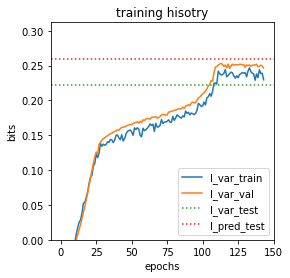

In [9]:
# Show training history
print('On test data:')

# Compute variational information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

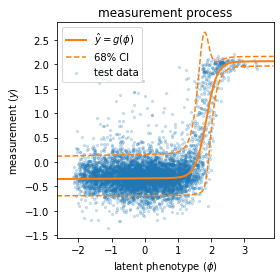

In [10]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

In [11]:
# Test simulate_data
sim_df = model.simulate_dataset(N=1000)
sim_df.head()

,set,yhat,phi,y,x
0,training,-0.340498,-1.261267,-0.370883,GUCGCCGGG
1,validation,-0.339788,-1.117791,0.150581,CCUGCCCUU
2,training,-0.323939,0.864381,-0.357039,CUCGUUAGG
3,training,-0.329921,0.610131,-0.206427,CCGGCUCGU
4,training,-0.337657,-0.686693,-0.347848,UGGGCCGAU
